#Assigment 2

##Importing packages and data preprocessing
This part is preparing the environments and loading the patients file. After loading the patient file, several preprocessing procedures will be implemented.


In [1]:
##connect with google drive to get datasets hypotension
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
##importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
##Read the hypotension_patient dataframe
##If run in local environment, please modify the file directory
df=pd.read_csv('/content/drive/MyDrive/Datasets/hypotension_patients.csv')
df.head(10)

,ID,anchor_age,gender,dod,apsiii,LoS,charlson_comorbidity_index
0,1,80,F,NaN,56,7.00,4
1,2,72,F,2137-09-02,49,12.92,6
2,3,82,M,2144-06-18,46,13.13,5
3,4,89,F,2155-12-07,86,4.92,7
4,5,69,F,2136-05-12,102,11.46,8
5,6,64,F,2185-10-09,88,9.96,10
6,7,60,F,NaN,50,2.54,3
7,8,87,M,2177-03-29,58,1.17,10
8,9,63,M,NaN,35,39.83,4
9,10,65,F,2155-12-03,49,3.58,5



Check whether there are missing values and each column data types in the datasets.

In [4]:
pd.set_option('display.max_columns', None)
hypotension_df = df.copy()

print(hypotension_df.isna().sum())
##seeing the column infomation, checking column type and non-null count
print(hypotension_df.info())


ID                               0
anchor_age                       0
gender                           0
dod                           1816
apsiii                           0
LoS                              0
charlson_comorbidity_index       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5106 non-null   int64  
 1   anchor_age                  5106 non-null   int64  
 2   gender                      5106 non-null   object 
 3   dod                         3290 non-null   object 
 4   apsiii                      5106 non-null   int64  
 5   LoS                         5106 non-null   float64
 6   charlson_comorbidity_index  5106 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 279.4+ KB
None


Only dod column has missing values, however, missing dod indicates that patient is alive. As a result, we will transform dod column, fill non-null value as 1(die) and null-value as 0(alive).

Id is not useful for our further analysis, so it will be removed.

Gender is categorical variable, so it needs to be transform into {'M': 1, 'F': 0}.

In [5]:
##transform dod column, death:1, survive:0
hypotension_df.loc[hypotension_df['dod'].notna(), 'dod']=int(1)
hypotension_df.loc[hypotension_df['dod'].isna(), 'dod']=int(0)
hypotension_df['dod']=hypotension_df['dod'].astype(int)

##transform gender
hypotension_df['gender'] = hypotension_df['gender'].map({'M': 1, 'F': 0})

##drop id column
final_df=hypotension_df.drop(columns=['ID'])
final_df.head(10)

,anchor_age,gender,dod,apsiii,LoS,charlson_comorbidity_index
0,80,0,0,56,7.00,4
1,72,0,1,49,12.92,6
2,82,1,1,46,13.13,5
3,89,0,1,86,4.92,7
4,69,0,1,102,11.46,8
5,64,0,1,88,9.96,10
6,60,0,0,50,2.54,3
7,87,1,1,58,1.17,10
8,63,1,0,35,39.83,4
9,65,0,1,49,3.58,5


##Part1 Exploratory data analysis

In [7]:
##summary statistics
final_df.describe()

,anchor_age,gender,dod,apsiii,LoS,charlson_comorbidity_index
count,5106.000000,5106.000000,5106.00000,5106.000000,5106.000000,5106.00000
mean,65.552683,0.558754,0.64434,60.314532,7.053651,5.21700
std,15.235907,0.496585,0.47876,28.860171,8.432716,2.57691
min,18.000000,0.000000,0.00000,3.000000,0.040000,0.00000
25%,56.000000,0.000000,0.00000,38.000000,1.960000,4.00000
50%,67.000000,1.000000,1.00000,53.000000,4.130000,5.00000
75%,77.000000,1.000000,1.00000,78.000000,8.960000,7.00000
max,91.000000,1.000000,1.00000,189.000000,103.500000,19.00000


There are 5106 records in the dataset.

The average age is 65.55, the average apsiii is 60.31, the average LoS is 7.05 and the average charlson comorbidity index is 5.21.

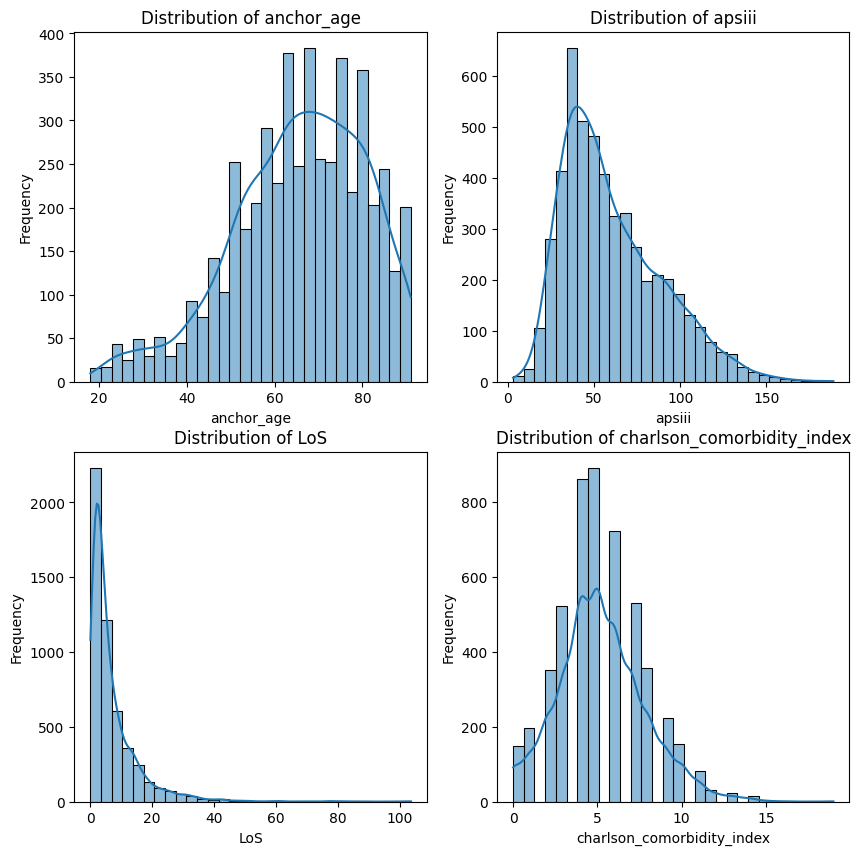

In [8]:
#draw ditribution of each continuous column
def plot_distributions(df):
    num_columns = df.shape[1]
    rows = 2
    cols = 2

    fig, axs = plt.subplots(rows, cols, figsize=(10, 10))

    for i, column in enumerate(df.columns):
        row_idx = i // cols
        col_idx = i % cols

        sns.histplot(df[column], bins=30, ax=axs[row_idx, col_idx], kde=True)
        axs[row_idx, col_idx].set_title(f'Distribution of {column}')
        axs[row_idx, col_idx].set_xlabel(column)
        axs[row_idx, col_idx].set_ylabel('Frequency')

    plt.show()

df_continuous=final_df.drop(columns=['gender','dod'])
plot_distributions(df_continuous)

The most frequent age range appears to be between 60 and 80. The spread of the data suggests a wider range of age, starting around 20 to 100. The distribution of age is a left-skewed distribution, indicating fewer younger individuals and a higher concentration on older generations in the datasets.

The distribution of apsiii is heavily right skewed. Most patients have likely between 30 and 60 apsiii score. Besides, the distribution  thins out considerably after 100. with very few cases reaching values over 150.

The LoS is highly right skewed. The majority of patients have a short length of stay, with the highest frequency appearing between 0 and 5 days.Only small number of patients who stay much longer than 20 days.

The Charlson Comorbidity Index distribution shows a more balanced, bell-shaped pattern with some right skewness. The peak frequency occurs around a score of 5, indicating that most individuals in this dataset have a moderate level of comorbidities.

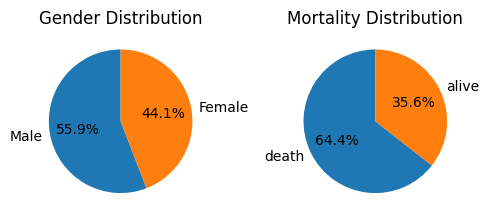

In [9]:
##Draw the pie chart to show distribution in categorical variable
category1_counts = final_df['gender'].value_counts()
category2_counts = final_df['dod'].value_counts()

# Create Pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))

ax1.pie(category1_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Gender Distribution')

ax2.pie(category2_counts, labels=['death', 'alive'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Mortality Distribution')

# show the chart
plt.tight_layout()
plt.show()

55.9% of the dataset consists of males, 44.1% of the dataset consists of females. 64.4% patient finally died and 35.6% patients stayed alive.

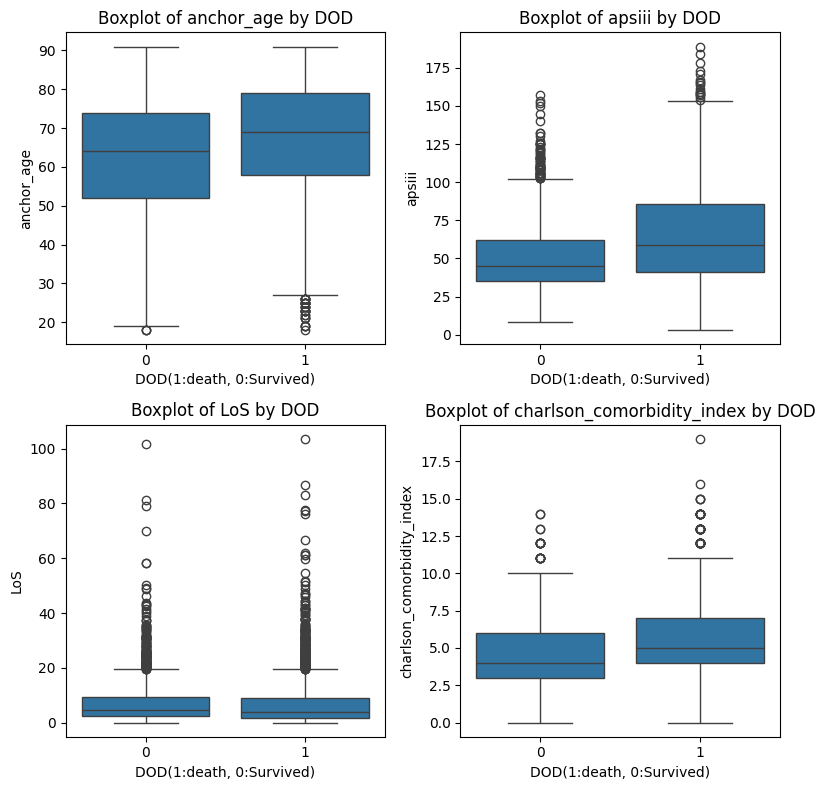

In [10]:
##draw boxplot of each numerical variable group by dod
def plot_boxplots_by_dod(df, columns, col):

  ##Calculate the grid size for the plot
  num_plts=len(columns)
  cols=math.ceil(num_plts/2)
  rows=math.ceil(num_plts/cols)
  fig, axs=plt.subplots(rows, cols, figsize=(4*cols,4*rows))
  axs=axs.flatten()

  ##draw boxplot for each column
  for i, column in enumerate(columns):
    sns.boxplot(x=col, y=column, data=df, ax=axs[i])
    axs[i].set_title(f'Boxplot of {column} by DOD')
    axs[i].set_xlabel('DOD(1:death, 0:Survived)')
    axs[i].set_ylabel(column)

  ##remove unused subplots
  for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

  plt.tight_layout()
  plt.show()

df_numerical=final_df.drop(columns=['gender', 'dod'])
columns=df_numerical.columns
plot_boxplots_by_dod(final_df, columns, 'dod')

Anchor age distributions for both deceased and survived groups are quite similar, with slightly older individuals being more represented in the death group, but age alone may not be a distinguishing factor.

The median apsiii score of survival patient is around 50, and the IQR is between 35 and 70, suggesting that most survivors have lower apsiii scores. While the median apsiii score in death group is higher, around 60, showing that patients who died tended to have higher severity scores. Besides, many high outliers in death patients, with scores exceeding 150, indicating that individuals with very high apsiii scores were more likely to die.

The length of stay distribution between survivors and non-survivors is similar, with both groups having median stays around 6 days. However, the deceased group has more extreme outliers, suggesting that some individuals who died stayed significantly longer in the hospital because they may have a more severe situation.

The Charlson Comorbidity Index shows a small but noticeable difference between survivors and non-survivors, with the deceased group having a slightly higher median score and more extreme outliers, indicating more severe comorbid conditions in those who died.

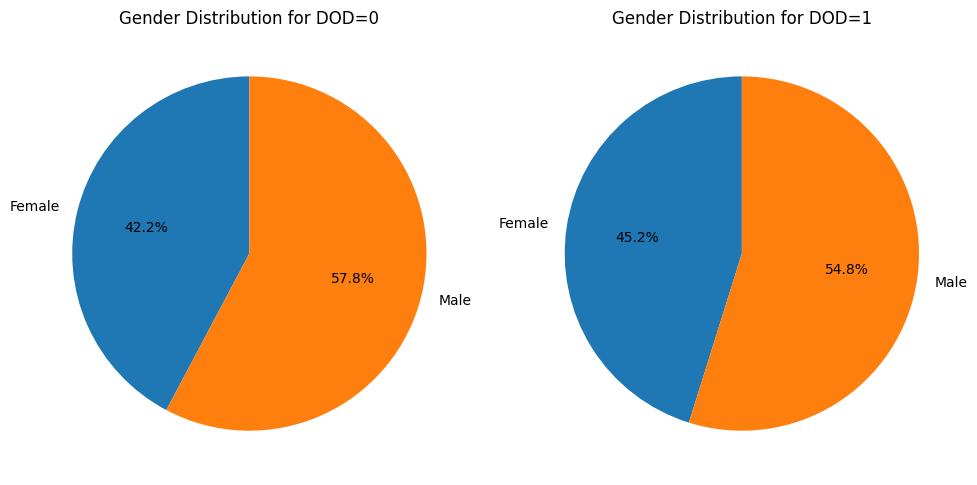

In [11]:
##draw pie chart of categorical variable
def plot_pie_chart_categorical(df):
  ##count the each gender group by dod value
  gender_couns_by_dod = df.groupby('dod')['gender'].value_counts().unstack()
  fig,axs = plt.subplots(1, 2, figsize=(10, 5))
  for i, dod_value in enumerate(gender_couns_by_dod.index):
    counts = gender_couns_by_dod.loc[dod_value]
    axs[i].pie(counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Gender Distribution for DOD={dod_value}')

  plt.tight_layout()
  plt.show()

plot_pie_chart_categorical(final_df)

In both groups (survived and deceased), males represent a slightly higher proportion compared to females.

##Part 2 Kmeans

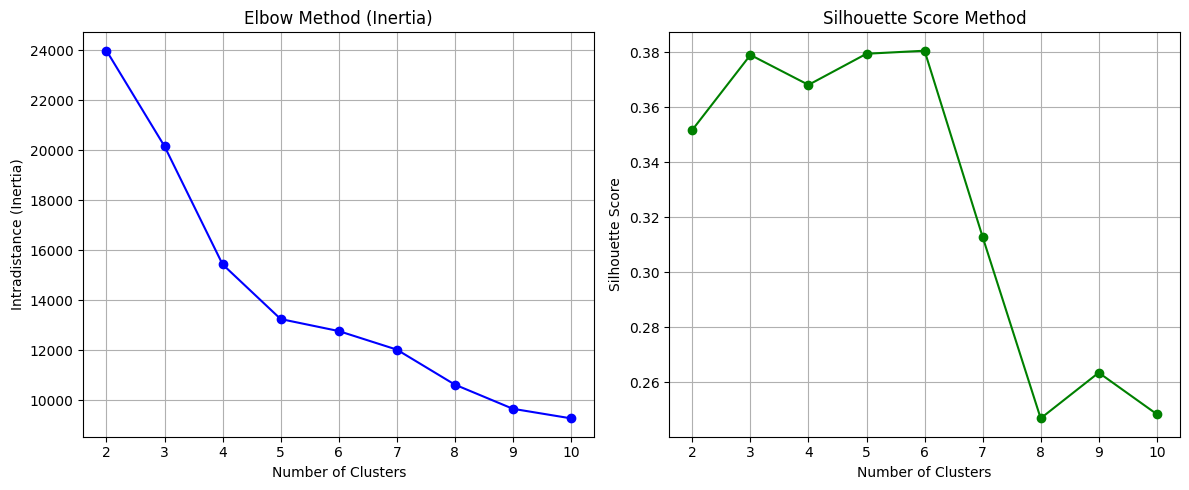

In [16]:
# Drop the 'dod' column and prepare the data for clustering
cluster_df = final_df.drop(columns=['dod'])

# Scale the data to standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Calculate intradistance (inertia) and silhouette score for different cluster numbers
intradistance = []
silhouette_scores = []
for num_of_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_of_clusters, random_state=42)
    kmeans.fit(scaled_data)
    intradistance.append(kmeans.inertia_)

    score = metrics.silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Create subplots for inertia and silhouette score
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the elbow method (inertia) on the left subplot
ks = range(2, 11)
ax[0].plot(ks, intradistance, marker='o', linestyle='-', color='b', label='Inertia')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intradistance (Inertia)')
ax[0].set_title('Elbow Method (Inertia)')
ax[0].grid(True)
ax[0].set_xticks(ks)

# Plot silhouette score on the right subplot
ax[1].plot(ks, silhouette_scores, marker='o', linestyle='-', color='g', label='Silhouette Score')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Score Method')
ax[1].grid(True)
ax[1].set_xticks(ks)

# Show both plots
plt.tight_layout()
plt.show()

The "elbow" appears around k = 4 or k = 5, where the inertia decreases more gradually beyond this point. This suggests that 4 or 5 clusters might be optimal based on the elbow method.

Since the optimal k is hard to tell only from elbow plot. I think applying Silhouette Score method is useful based on elbow criteria. The silhouette score measures how well-separated and well-defined the clusters are. Higher scores indicate better-defined clusters. The highest silhouette score occurs at k=4 or k=5, followed by dropping sharply after k=5.

In conclusion, based on elbow method, k=4 or 5 is reasonable, as inertia drops more slowly after this point. Combining silhouette score peaks at k = 4 or 5, providing additional support for choosing k=4 or k=5 is a good choice for clusters. Let us take both and do further analysis.




In [17]:
#use k=4 and 5 to train different kmeans and compare them
n_cluster=4
kmeans=KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(scaled_data)
n_cluster=5
kmeans2=KMeans(n_clusters=n_cluster, random_state=42)
kmeans2.fit(scaled_data)
final_df['cluster_k_4']=kmeans.labels_
final_df['cluster_k_5']=kmeans2.labels_
final_df.head(10)

,anchor_age,gender,dod,apsiii,LoS,charlson_comorbidity_index,cluster_k_4,cluster_k_5
0,80,0,0,56,7.00,4,0,0
1,72,0,1,49,12.92,6,0,0
2,82,1,1,46,13.13,5,3,1
3,89,0,1,86,4.92,7,0,0
4,69,0,1,102,11.46,8,0,0
5,64,0,1,88,9.96,10,0,0
6,60,0,0,50,2.54,3,0,0
7,87,1,1,58,1.17,10,3,1
8,63,1,0,35,39.83,4,2,2
9,65,0,1,49,3.58,5,0,0


In [18]:
cluster_means = final_df[['anchor_age', 'apsiii','LoS','charlson_comorbidity_index','gender','dod','cluster_k_4']].groupby('cluster_k_4').mean()

##patient number of each cluster
cluster_means['number']=final_df[['anchor_age', 'apsiii','LoS','charlson_comorbidity_index','gender','dod','cluster_k_4']].groupby('cluster_k_4').size()
display(cluster_means)

,anchor_age,apsiii,LoS,charlson_comorbidity_index,gender,dod,number
cluster_k_4,,,,,,,
0,72.512266,62.207944,5.531600,6.021612,0.000000,0.708528,1712
1,46.338409,54.776650,5.779628,2.343486,0.648900,0.503384,1182
2,61.813084,73.959502,31.370218,4.785047,0.607477,0.610592,321
3,71.896880,59.745637,5.100201,6.358012,1.000000,0.680063,1891


In [19]:
cluster_means = final_df[['anchor_age', 'apsiii','LoS','charlson_comorbidity_index','gender','dod','cluster_k_5']].groupby('cluster_k_5').mean()

####patient number of each cluster
cluster_means['number']=final_df[['anchor_age', 'apsiii','LoS','charlson_comorbidity_index','gender','dod','cluster_k_5']].groupby('cluster_k_5').size()
display(cluster_means)

,anchor_age,apsiii,LoS,charlson_comorbidity_index,gender,dod,number
cluster_k_5,,,,,,,
0,72.791995,59.455428,5.278078,6.003032,0.000000,0.701637,1649
1,71.445141,48.053918,4.690583,6.071473,1.000000,0.636364,1595
2,61.692063,73.187302,31.575238,4.761905,0.600000,0.612698,315
3,67.408046,109.727969,7.764617,6.480843,0.856322,0.840996,522
4,44.978537,51.654634,5.689346,2.119024,0.606829,0.474146,1025


The cluster 0 in cluster_k_5 seems to be a subset of cluster 0 in cluster_k_4. The cluster 2 in cluster_k_5 is a subset of cluster 2 in cluster_k_4. The cluster 3 in cluster_k_5 seems to be a subset of cluster 3 in cluster_k_4, and cluster4 in cluster_k_5 seems to be subset of cluster1 in cluster_k_4, while cluster 1 in cluster_k_5 represents a group of patients with high mortality rates of 86.1%. Cluster_k_5 provides a more refined segmentation, particularly for critically ill patients. It allows for better identification of patients with longer lengths of stay and higher severity scores, making it a more detailed model when a more nuanced classification of patients is required.

In conclusion, k=5 is likely the better option for more detailed analysis, particularly if you aim to distinguish between patients with longer hospital stays and higher severity levels.

##Part 3 Analysis of clusters' difference

In [20]:
#showing different clusters means
cluster_means = final_df[['anchor_age', 'apsiii','LoS','charlson_comorbidity_index','gender','dod','cluster_k_5']].groupby('cluster_k_5').mean()

display(cluster_means)

,anchor_age,apsiii,LoS,charlson_comorbidity_index,gender,dod
cluster_k_5,,,,,,
0,72.791995,59.455428,5.278078,6.003032,0.000000,0.701637
1,71.445141,48.053918,4.690583,6.071473,1.000000,0.636364
2,61.692063,73.187302,31.575238,4.761905,0.600000,0.612698
3,67.408046,109.727969,7.764617,6.480843,0.856322,0.840996
4,44.978537,51.654634,5.689346,2.119024,0.606829,0.474146


Looking at means of different features belonged to clusters.

Cluster 0's average age is 72.59 years(old), average APSIII is 50.31(moderate), average length of stay is 4.89(relatively short stay), average Charlson Comorbidity index is 5.74(Moderate), and gender in this cluster is predominantly female. It represents an older female population with moderate APSIII scores and a moderate comorbidity index. Despite a relatively short length of stay, the mortality is relatively high(65.71%).

Cluster 1's average age is 69.19 years(old), average APSIII is 107.18(Very high), average length of stay is 7.49(moderate stay), average Charlson Comorbidity index is 6.71(Slightly higher), and gender in this cluster is nearly uniform distributed. Cluster 1 represents an older population with severe APSIII which is extremely biggest among other clusters and somewhat high comorbidity scores. The mortality rate is 86.14% in this group.

Cluster 2's average age is 44.77 years(young), average APSIII is 52.64(moderate severity score), average length of stay is 5.81(short stay), average Charlson Comorbidity index is 2.09(Very low), and gender is mixed and male accounts for 62%. This cluster represents a younger group of patients with moderate APSIII scores and a much lower comorbidity burden. The length of stay is short, and the mortality rate is considerably lower (47.81%) compared to the older clusters. This indicates that younger age and lower comorbidity are associated with better outcomes.

Cluster 3's average age is 71.43 years(old age), average APSIII is 48.1(Slightly lower), average length of stay is 4.74(short stay), average Charlson Comorbidity index is 6.06(slightly higher), and gender is predominantly male. This cluster is characterized by old aged male patients with slightly lower APSIII scores and slightly higher comorbidity burden, and their mortality rate is 63.5%.

Cluster 4's average age is 61.64(middle-aged), average APSIII is 73.35(higher severity), the LOS is 31.84(Extremely long), average Charlson Comorbidity index is 4.76, the gender is mixed and man accounts a little more. These group mortality is 61.8%, indicating higher severity APSIII can get not bad outcomes after long care of ICU.

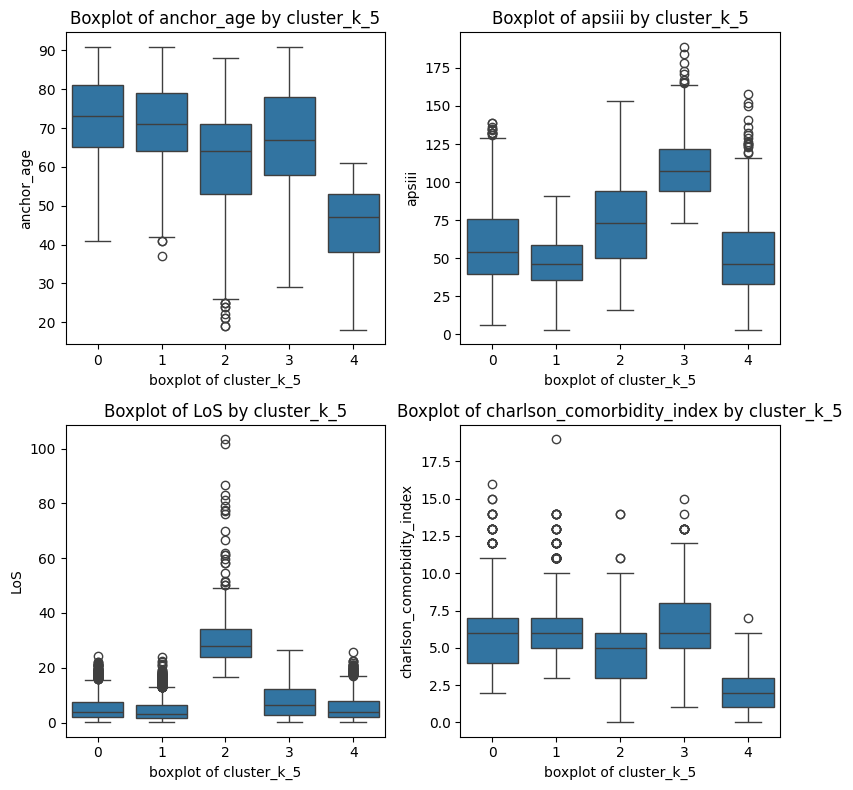

In [21]:
##Draw boxplot of continuous features group by clusters
def plot_boxplots(df, columns, col):
  num_plts=len(columns)
  cols=math.ceil(num_plts/2)
  rows=math.ceil(num_plts/cols)
  fig, axs=plt.subplots(rows, cols, figsize=(4*cols,4*rows))
  axs=axs.flatten()
  for i, column in enumerate(columns):
    sns.boxplot(x=col, y=column, data=df, ax=axs[i])
    axs[i].set_title(f'Boxplot of {column} by {col}')
    axs[i].set_xlabel(f'boxplot of {col}')
    axs[i].set_ylabel(column)

  for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

  plt.tight_layout()
  plt.show()

plot_boxplots(final_df, columns, 'cluster_k_5')

In Anchor Age by Cluster boxplot, Clusters 0, 1 and 3 represent older patients, while Cluster 2 has much younger patients. Cluster 4 is an middle-aged group.

In APSIII by Cluster boxplot, Cluster 1 is associated with the most severe conditions (highest APSIII) with a lot of extreme outliers, while Cluster 0,2,3 tend to have lower severity scores. Clusters 4 has moderate severity scores.

In LoS by cluster boxplot, Cluster 4 patients have much longer hospital stays, likely reflecting the severity of their conditions. The other clusters have shorter and more uniform stays, although they still include patients with extended stays as outliers.

In Charlson Comorbidity Index by Cluster boxplot,
Clusters 0 and 1 have the highest comorbidity burdens, with several patients having extreme scores. Cluster 2 has the lowest comorbidity burden, which is consistent with the younger age group. Cluster 3 and 4 have a moderate level of comorbidities.


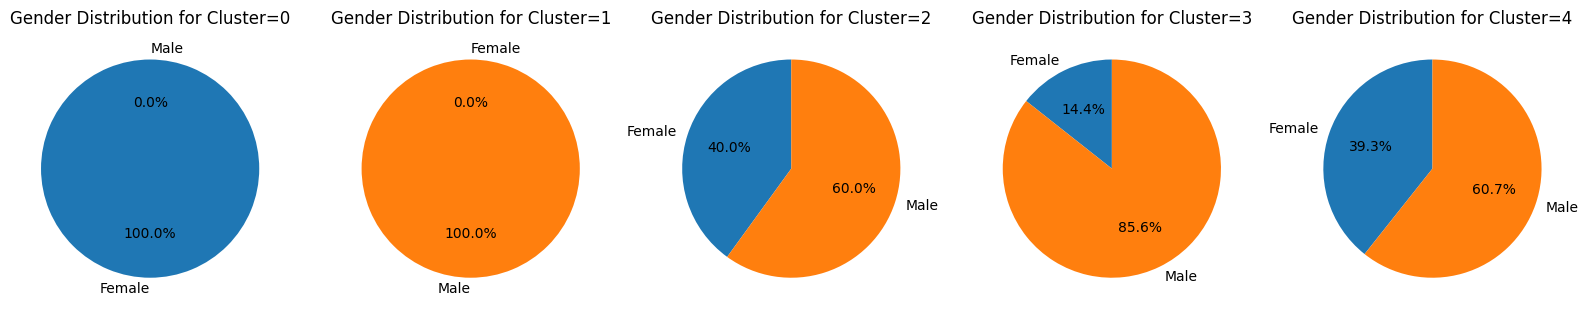

In [22]:
##draw pie chart of categorical variable
##count the each gender group by clusters
gender_couns_by_cluster = final_df.groupby('cluster_k_5')['gender'].value_counts().unstack(fill_value=0)
fig,axs = plt.subplots(1, 5, figsize=(16, 4))
for i, value in enumerate(gender_couns_by_cluster.index):
  counts = gender_couns_by_cluster.loc[value]
  axs[i].pie(counts, labels=['Female','Male'], autopct='%1.1f%%', startangle=90)
  axs[i].set_title(f'Gender Distribution for Cluster={value}')

plt.tight_layout()
plt.show()


Cluster 0 and Cluster 3 are gender-exclusive clusters, with Cluster 0 composed entirely of females and Cluster 3 entirely of males. This suggests that the characteristics driving these clusters are highly gender-specific.
Cluster 1, Cluster 2, and Cluster 4 show more balanced gender distributions, with males forming a majority in all three clusters but with varying degrees of representation from females:

1. Cluster 1 is the most balanced, with males slightly outnumbering females.

2. Cluster 2 has a more pronounced male majority (62.7%).

3. Cluster 4 shows a moderate male majority but is still relatively balanced.

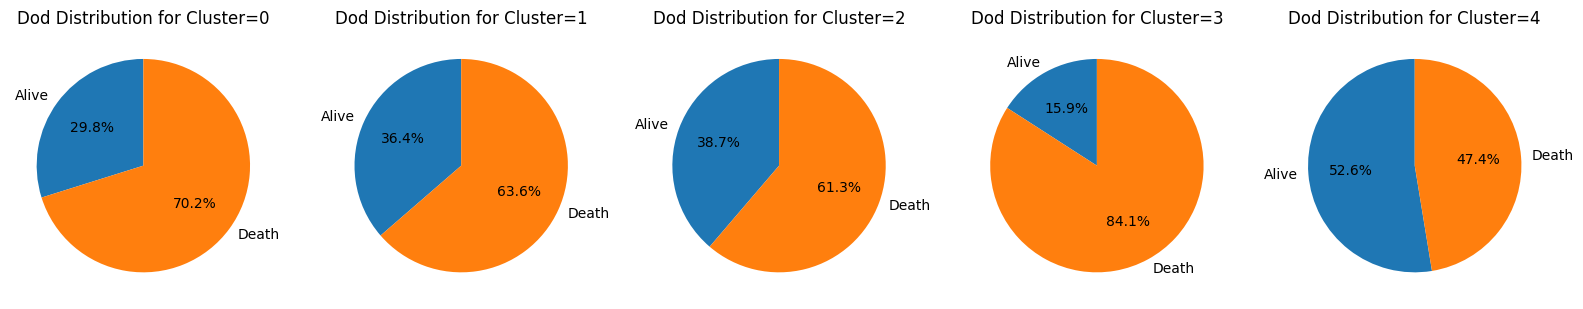

In [23]:
##draw pie chart of categorical variable
##count the each dod group by clusters
gender_couns_by_cluster = final_df.groupby('cluster_k_5')['dod'].value_counts().unstack(fill_value=0)
fig,axs = plt.subplots(1, 5, figsize=(16, 4))
for i, value in enumerate(gender_couns_by_cluster.index):
  counts = gender_couns_by_cluster.loc[value]
  axs[i].pie(counts, labels=['Alive','Death'], autopct='%1.1f%%', startangle=90)
  axs[i].set_title(f'Dod Distribution for Cluster={value}')

plt.tight_layout()
plt.show()

Cluster 1 shows the highest death rate at 86.1%, clearly standing out as the most critical group. Patients in this cluster face the most severe health conditions, as reflected by the high mortality rate. Cluster 0, Cluster 3, and Cluster 4 have relatively similar mortality rates, with around 60-65% of patients dying. These clusters represent patients who are at significant risk but not as critically ill as those in Cluster 1. Cluster 2 is the only cluster with a higher survival rate (52.2% alive), suggesting that this group has relatively better health outcomes compared to the other clusters.